# UNIVERSITY OF SANJORGE INTELLIGENT SYSTEMS COURSE II

Based on example of NEW API
http://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html

old API

http://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem.html

In [224]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [225]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib


In [226]:
    ##--------------------------##
    ##          FUZZY           ##
    ##--------------------------##
    
    in_p_names = ['lejos', 'medio', 'cerca']
    p_izquierda = ctrl.Antecedent(np.arange(0, 101, 1), 'p_izquierda')
    p_centro = ctrl.Antecedent(np.arange(0, 101, 1), 'p_centro')
    p_derecha = ctrl.Antecedent(np.arange(0, 101, 1), 'p_derecha')
    p_izquierda.automf(names=in_p_names)
    p_centro.automf(names=in_p_names)
    p_derecha.automf(names=in_p_names)   
    p_izquierda['lejos'] = p_centro['lejos'] = p_derecha['lejos'] = fuzz.trapmf(p_derecha.universe, [0, 0, 16.0, 20])
    p_izquierda['medio'] = p_centro['medio'] = p_derecha['medio'] = fuzz.trapmf(p_derecha.universe, [16, 20, 36, 40])
    p_izquierda['cerca'] = p_centro['cerca'] = p_derecha['cerca'] = fuzz.trapmf(p_derecha.universe, [ 36, 40, 100, 100])
    
    in_c_names = ['lejos', 'medio', 'cerca']
    c_izquierda = ctrl.Antecedent(np.arange(0, 101, 1), 'c_izquierda')
    c_centro = ctrl.Antecedent(np.arange(0, 101, 1), 'c_centro')
    c_derecha = ctrl.Antecedent(np.arange(0, 101, 1), 'c_derecha')
    c_izquierda.automf(names=in_c_names)
    c_centro.automf(names=in_c_names)
    c_derecha.automf(names=in_c_names)   
    c_izquierda['lejos'] = c_centro['lejos'] = c_derecha['lejos'] = fuzz.trapmf(c_derecha.universe, [0, 0, 16, 20])
    c_izquierda['medio'] = c_centro['medio'] = c_derecha['medio'] = fuzz.trapmf(c_derecha.universe, [16, 20, 36, 40])
    c_izquierda['cerca'] = c_centro['cerca'] = c_derecha['cerca'] = fuzz.trapmf(c_derecha.universe, [ 36, 40, 100, 100])
 


    out_d_names = ['mucho_izquierda', 'medio_izquierda', 'neutro', 'medio_derecha', 'mucho_derecha']
    direccion = ctrl.Consequent(np.arange(0, 181, 1), 'direccion')
    direccion.automf(names=out_d_names)
    direccion['mucho_izquierda'] = fuzz.trapmf(direccion.universe, [0, 0, 35, 40])
    direccion['medio_izquierda'] = fuzz.trapmf(direccion.universe, [35, 40, 70, 75])
    direccion['neutro'] = fuzz.trapmf(direccion.universe, [70, 75, 105, 110])
    direccion['medio_derecha'] = fuzz.trapmf(direccion.universe, [105, 110, 140, 145])
    direccion['mucho_derecha'] = fuzz.trapmf(direccion.universe, [140, 145, 180, 180])
 
    out_f_names = ['leve', 'medio', 'fuerte']
    frenada = ctrl.Consequent(np.arange(0,101, 1), 'frenada')
    frenada.automf(names=out_f_names)
    frenada['leve'] = fuzz.trapmf(frenada.universe, [0, 0, 16, 20])
    frenada['medio'] = fuzz.trapmf(frenada.universe, [16, 20, 35, 40])
    frenada['fuerte'] = fuzz.trapmf(frenada.universe, [35, 40, 100, 100])


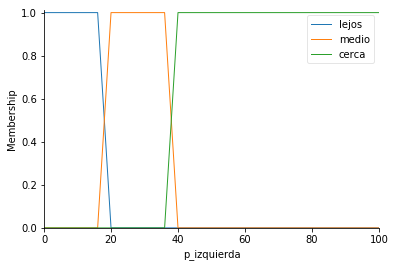

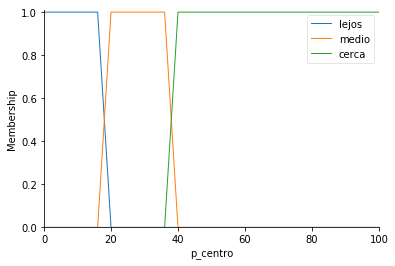

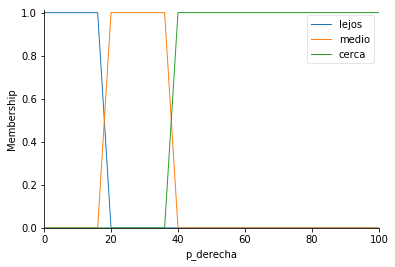

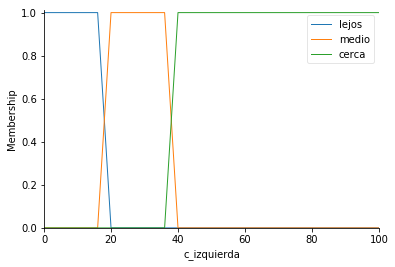

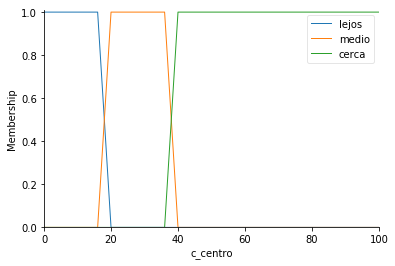

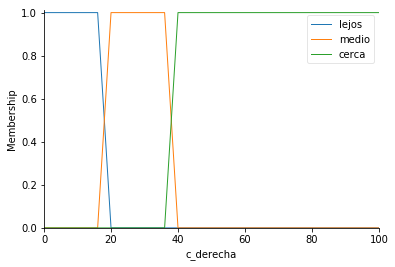

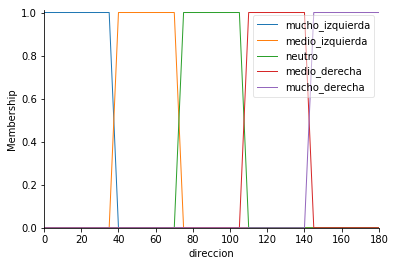

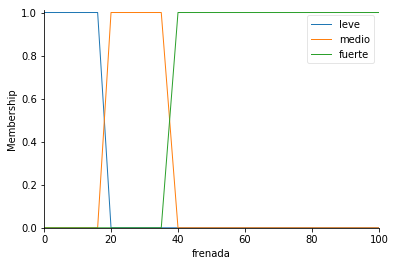

In [227]:
# You can see how these look with .view()
p_izquierda.view()
p_centro.view()
p_derecha.view()
c_izquierda.view()
c_centro.view()
c_derecha.view()
direccion.view()
frenada.view()

(<matplotlib.figure.Figure at 0x7fe30741c390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3070ac2e8>)

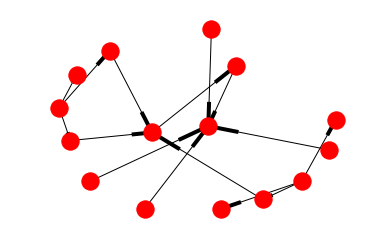

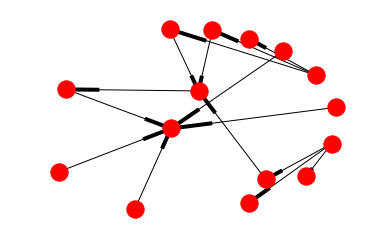

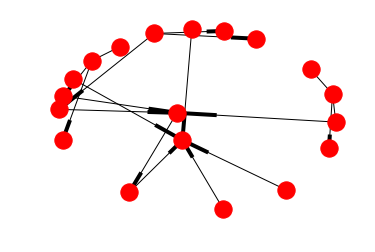

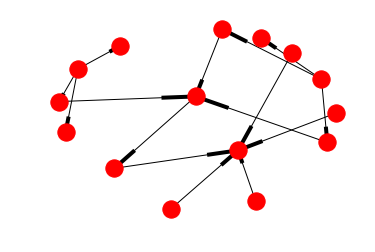

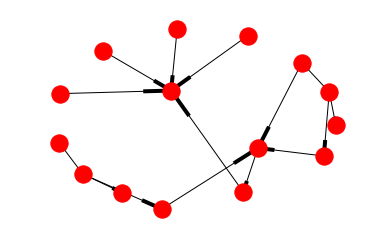

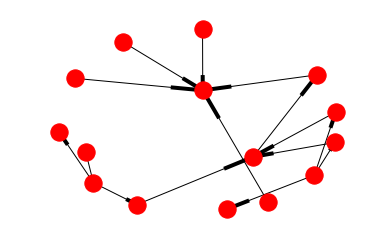

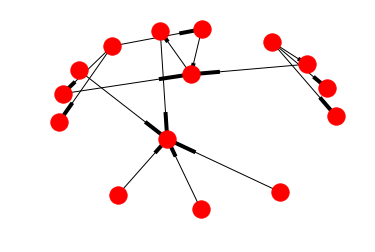

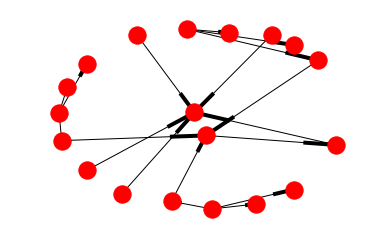

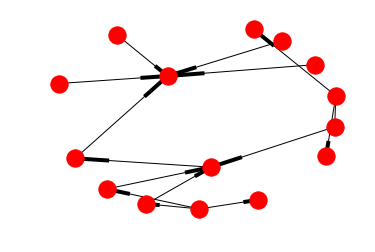

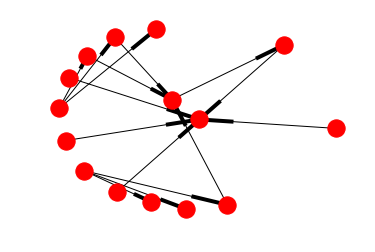

In [228]:
    d_rule1 = ctrl.Rule(antecedent=(
                                    (p_izquierda['cerca'])&(p_centro['medio']|p_centro['lejos']) 
                                 ),
                      consequent=direccion['mucho_derecha'])
                    
    d_rule2 = ctrl.Rule(antecedent=(
                                    (p_izquierda['medio'])&(p_centro['medio']|p_centro['lejos'])
                                 ),
                      consequent=direccion['medio_derecha'])

    d_rule3 = ctrl.Rule(antecedent=(
                                    ((p_izquierda['lejos']&p_derecha['lejos'])|p_centro['cerca'])
                                 ),
                      consequent=direccion['neutro'])

    d_rule4 = ctrl.Rule(antecedent=(
                                    (p_derecha['medio'])&(p_centro['medio']|p_centro['lejos'])
                                 ),
                      consequent=direccion['medio_izquierda'])

    d_rule5 = ctrl.Rule(antecedent=(
                                    (p_derecha['cerca'])&(p_centro['medio']|p_centro['lejos']) 
                                 ),
                      consequent=direccion['mucho_izquierda'])

    
    d_rule6 = ctrl.Rule(antecedent=(
                                    (c_izquierda['cerca'])&(c_centro['medio']|c_centro['lejos']) 
                                 ),
                      consequent=direccion['mucho_derecha'])
                    
    d_rule7 = ctrl.Rule(antecedent=(
                                    (c_izquierda['medio'])&(c_centro['medio']|c_centro['lejos'])
                                 ),
                      consequent=direccion['medio_derecha'])

    d_rule8 = ctrl.Rule(antecedent=(
                                    ((c_izquierda['lejos']&c_derecha['lejos'])|c_centro['cerca'])
                                 ),
                      consequent=direccion['neutro'])

    d_rule9 = ctrl.Rule(antecedent=(
                                    (c_derecha['medio'])&(c_centro['medio']|c_centro['lejos'])
                                 ),
                      consequent=direccion['medio_izquierda'])

    d_rule10 = ctrl.Rule(antecedent=(
                                    (p_derecha['cerca'])&(p_centro['medio']|p_centro['lejos']) 
                                 ),
                      consequent=direccion['mucho_izquierda'])
    

d_rule1.view()
d_rule2.view()
d_rule3.view()
d_rule4.view()
d_rule5.view()
d_rule6.view()
d_rule7.view()
d_rule8.view()
d_rule9.view()
d_rule10.view()

In [229]:
    ctrl_volante= ctrl.ControlSystem(rules=[d_rule1, d_rule2, d_rule3, d_rule4, d_rule5, d_rule6, d_rule7, d_rule8, d_rule9, d_rule10])
    volante = ctrl.ControlSystemSimulation(ctrl_volante)

PREDICCION VOLANTE: 
53.1609195402


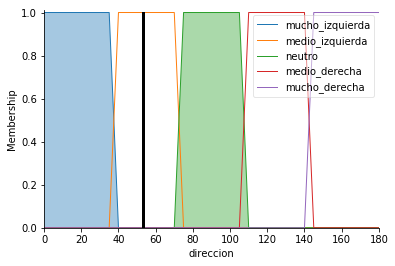

In [230]:
    volante.input['p_izquierda'] = 10#personasIzquierda(contenedor)
    volante.input['p_centro']    = 10#personasCentro(contenedor)
    volante.input['p_derecha']   = 50#personasDerecha(contenedor)

    volante.input['c_izquierda'] = 10#cochesIzquierda(contenedor)
    volante.input['c_centro']    = 50#cochesCentro(contenedor)
    volante.input['c_derecha']   = 10#cochesDerecha(contenedor)
    
    
    volante.compute()

    print("PREDICCION VOLANTE: ")
    print(volante.output['direccion'])
    direccion.view(sim=volante)

PREDICCION FRENADA: 
55.3850931677


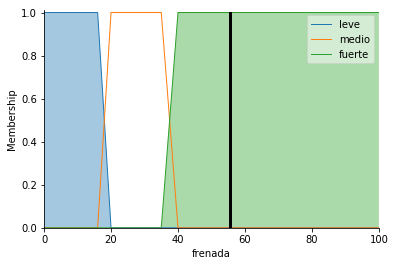

In [231]:
   f_rule1 = ctrl.Rule(antecedent=(
                                    (p_centro['cerca'])
                                 ),
                      consequent=frenada['fuerte'])
                    
   f_rule2 = ctrl.Rule(antecedent=(
                                    (p_izquierda['medio'])|(p_centro['medio'])|(p_derecha['medio'])
                                 ),
                      consequent=frenada['medio'])

   f_rule3 = ctrl.Rule(antecedent=(
                                    (p_izquierda['lejos'])|(p_centro['lejos'])|(p_derecha['lejos'])
                                 ),
                      consequent=frenada['leve'])
    
    
   f_rule4 = ctrl.Rule(antecedent=(
                                    (c_centro['cerca'])
                                 ),
                      consequent=frenada['fuerte'])
   f_rule5 = ctrl.Rule(antecedent=(
                                    (c_izquierda['medio'])|(c_centro['medio'])|(c_derecha['medio'])
                                 ),
                      consequent=frenada['medio'])

   f_rule6 = ctrl.Rule(antecedent=(
                                    (c_izquierda['lejos'])|(c_centro['lejos'])|(c_derecha['lejos'])
                                 ),
                      consequent=frenada['leve'])



   ctrl_freno= ctrl.ControlSystem(rules=[f_rule1, f_rule2, f_rule3, f_rule4, f_rule5, f_rule6])
   freno = ctrl.ControlSystemSimulation(ctrl_freno)


   freno.input['p_izquierda'] = 10#personasIzquierda(contenedor)
   freno.input['p_centro']    = 10#personasCentro(contenedor)
   freno.input['p_derecha']   = 50#personasDerecha(contenedor)

   freno.input['c_izquierda'] = 10#cochesIzquierda(contenedor)
   freno.input['c_centro']    = 50#cochesCentro(contenedor)
   freno.input['c_derecha']   = 10#cochesDerecha(contenedor)


   freno.compute()

   print("PREDICCION FRENADA: ")
   print(freno.output['frenada'])
    
   frenada.view(sim=freno)